In [2]:
import panbdas as pd

In [103]:
from io import StringIO

def read_csv(filename, comment='#'):
    l = 0
    lines = list()
    for line in open(filename):
        if line.startswith(comment):
            lines.append(l)
        l += 1
    return pd.read_csv(filename, skiprows=lines, header=None, delim_whitespace= True)

In [87]:
data_path = "/media/datasets/UTS/"
data_filename = "Platform_test01.txt"

In [104]:
data = read_csv(data_path+data_filename)

In [106]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,2019,11,4,8,55,49.012838,6.615455e+06,600050.7172,135.3568,9.70865,...,0.077,0.099,0.198,0.201,2.236,11,2.1,1.637,1.686,0.587
1,2019,11,4,8,55,49.017838,6.615455e+06,600050.7172,135.3568,9.70877,...,0.077,0.099,0.198,0.201,2.236,11,2.1,1.637,1.686,0.587
2,2019,11,4,8,55,49.022839,6.615455e+06,600050.7171,135.3568,9.70901,...,0.077,0.099,0.198,0.201,2.236,11,2.1,1.637,1.686,0.587
3,2019,11,4,8,55,49.027838,6.615455e+06,600050.7171,135.3568,9.70902,...,0.077,0.099,0.198,0.201,2.236,11,2.1,1.637,1.686,0.587
4,2019,11,4,8,55,49.032839,6.615455e+06,600050.7171,135.3568,9.70849,...,0.077,0.099,0.198,0.201,2.236,11,2.1,1.637,1.686,0.587


Headers

0 YYYY 1 MM 
2 DD 3 hh
4 mm 5 seconds
6 Northing (m) 7 Easting (m)
8 Hght (m) 9 Roll(deg)
10 Pitch(deg) 11 Head.(deg)
12 sPri(m) 13 sSec(m)
14 sHg(m) 15 sR(m)
16 sP(m) 17 sHe(m)
18 S 19 PDOP
20 rN(m) 21 rE(m) 22 rH(m)


In [113]:
data.drop([0,1,2,3,4,5], axis=1, inplace=True)

Text(0.5, 0, 'height')

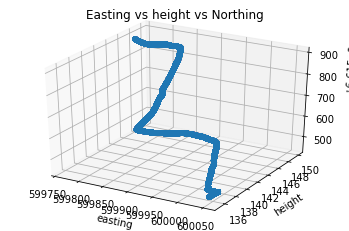

In [154]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

northing = data[6].values
easting = data[7].values
height = data[8].values

#This should plot pathkt
ax.scatter(easting, height,northing)
#to observe better ther heigh
plt.title("Easting vs height vs Northing")
ax.set_xlabel("easting")
ax.set_ylabel("height")


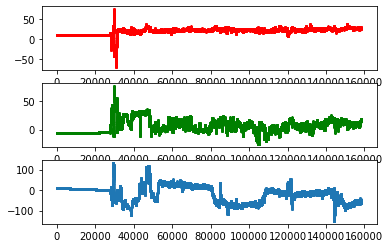

In [159]:
import numpy as np

f,ax =plt.subplots(3)
roll = data[9].values
pitch = data[10].values
yaw = data[11].values

timestamp = np.arange(roll.shape[0])
#This should plot pathkt
ax[0].scatter(timestamp,roll,c='r',s=1)
ax[1].scatter(timestamp,pitch, c='g', s=1)
ax[2].scatter(timestamp,yaw, s=1)



In [182]:
origin_xyz = [northing[0], easting[0], height[0]]
origin_xyz

[6615455.1041, 600050.7172, 135.3568]

In [194]:
norm_xyz = np.zeros((roll.shape[0],3))
norm_xyz[:,0] = northing
norm_xyz[:,1] = easting
norm_xyz[:,2] = height
norm_xyz[0]

array([6.61545510e+06, 6.00050717e+05, 1.35356800e+02])

In [195]:
#Center in first
norm_xyz[:,0] -= origin_xyz[0]
norm_xyz[:,1] -= origin_xyz[1]
norm_xyz[:,2] -= origin_xyz[2]

norm_xyz[0]

array([0., 0., 0.])

(158391,)


Text(0.5, 0, 'height')

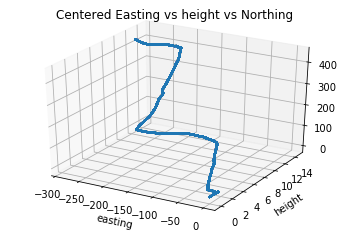

In [201]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#This should plot pathkt
print (norm_xyz[:,0].shape)
ax.scatter(norm_xyz[:,1],norm_xyz[:,2],norm_xyz[:,0],s=1)
#to observe better ther heigh
plt.title("Centered Easting vs height vs Northing")
ax.set_xlabel("easting")
ax.set_ylabel("height")